##### 1.读取data中2023_6文件夹中的openrank数据集，分析美国排名前一百的项目的的value的最大值、最小值、均值以及中位数。

In [3]:
import pandas as pd
data = pd.read_csv("./data/2023_6/open_rank_20236.csv")
def showdata(datas:pd.DataFrame,col:str):
    print("最大值：{}".format(datas[col].max()))
    print("最小值：{}".format(datas[col].min()))
    print("均值：{}".format(datas[col].mean()))
    print("中位数：{}".format(datas[col].median()))

showdata(data,'value')

最大值：1394.45
最小值：200.68
均值：346.9679
中位数：273.66999999999996


##### 2.读取data中2022文件夹下的activity_2020文件，分析美国排名前十的项目的平均增长率。

C:\Users\34065\AppData\Local\Temp\ipykernel_21732\3755821903.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dataArr[i][j] = (float(datas.loc[i][j+2])-float(datas.loc[i][j+1]))/float(datas.loc[i][j+1])


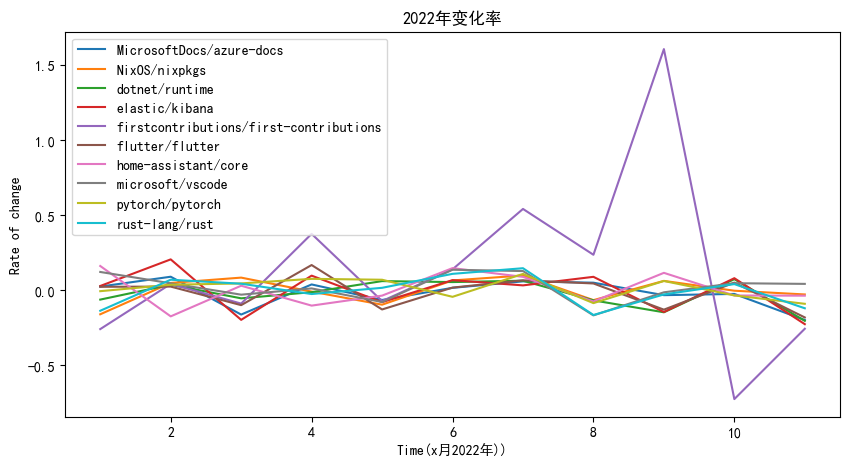

平均变化率：
项目:MicrosoftDocs/azure-docs , 平均变化率: -0.017927806693960283.
项目:NixOS/nixpkgs , 平均变化率: 0.00029453388757519605.
项目:dotnet/runtime , 平均变化率: -0.022848293771737936.
项目:elastic/kibana , 平均变化率: -0.003650706695878346.
项目:firstcontributions/first-contributions , 平均变化率: 0.1408237440823502.
项目:flutter/flutter , 平均变化率: -0.012404263515657559.
项目:home-assistant/core , 平均变化率: 0.008452684560254876.
项目:microsoft/vscode , 平均变化率: 0.022904691766440503.
项目:pytorch/pytorch , 平均变化率: 0.013160383781906931.
项目:rust-lang/rust , 平均变化率: -0.003778048850522401.


In [4]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.sans-serif'] = ['SimHei'] # 设置字体为SimHei
plt.rcParams['axes.unicode_minus']=False # 修复负号问题
data = pd.read_csv("./data/2022/activity_2022.csv")

def getRateOfChange(datas:pd.DataFrame):
    col = []
    index = datas['repo']
    for i in range(1,12):
        col.append("change {}".format(i))
    dataArr = np.ndarray(shape=(10,11))
    #print(ret)
    for i in range(0,10):
        for j in range(0,11):
            dataArr[i][j] = (float(datas.loc[i][j+2])-float(datas.loc[i][j+1]))/float(datas.loc[i][j+1])
    ret = pd.DataFrame(data=dataArr,index=index,columns=col,dtype=float)
    return ret

def showAct(datas:pd.DataFrame):
    len = datas.shape[0]
    sz = datas.shape[1]
    #print(len)
    x = np.arange(1,sz+1,1)
    #print(x)
    for i in range(len):
        y = np.array(datas.iloc[i])
        #print(y)
        plt.plot(x,y,label=datas.index[i])
def showAveChange(datas:pd.DataFrame):
    len = datas.shape[0]
    print("平均变化率：")
    for i in range(len):
        print("项目:{} , 平均变化率: {}.".format(datas.index[i],datas.iloc[i].mean()))
        
changedata = getRateOfChange(data)
plt.figure(figsize=(10,5))
plt.title("2022年变化率")
plt.ylabel("Rate of change")
plt.xlabel("Time(x月2022年))")
showAct(changedata)
plt.legend(changedata.index)
plt.show()
showAveChange(changedata)



这里可以看到firstcontribution的变化率波动较大，其他的相对平稳，就平均增长率来说，MicrosoftDocs/azure-docs，dotnet/runtime，elastic/kibana，flutter/flutter，rust-lang/rust小于0，其他均大于0.

##### 3.data/2022/china_2022.csv表示中国开源领域排名前十的企业。data/2022/global_2022.csv表示开源领域全球前十的的企业，请通过各种统计指标比较两者的各种数据差异。

In [ ]:
dataChina = pd.read_csv(r"./data/2022/china_2022.csv")
dataGlobal = pd.read_csv(r"./data/2022/global_2022.csv")


        name  issue_comment  open_issue  open_pull  review_comment  \
0    Alibaba         111972       22397      35266           48412   
1      Baidu          79370       15580      27414           35072   
2  Ant group          83116       15944      17940           20815   
3    PingCAP         167814        8155      23052           60402   
4    Tencent          39949       10162      20777            7650   
5  ESPRESSIF          31974        4800       1823            2113   
6  ByteDance          17186        4567       7786            5388   
7  Fit2Cloud          30600        5624      13966            2307   
8  StarRocks          38333        3711      12901           14052   
9     Deepin          11741         752       8202            2364   

   merged_pull  rank      value  rankDelta  valueDelta  
0        26732     1  103368.49          0    21093.11  
1        21680     2   71636.82          0    10032.08  
2        14464     3   61897.32          0     6380.83  
3